In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
# Supress Warnings

columnas_a_usar = ['Modelo', 'Precio_Venta', 'Kilometro','asientos','Motor','max_power','kilometraje']

# Leer el archivo CSV y seleccionar solo las columnas especificadas

data = pd.read_csv('./Cardetailsv3.csv', usecols=columnas_a_usar)

#data = pd.read_csv('datos.csv', dtype={'columna_numerica': float})
#data=pd.DataFrame(pd.read_csv("./Cardetailsv3.csv"))
#data=pd.read_csv('./Cardetailsv3.csv')
data.head(20)


,Modelo,Precio_Venta,Kilometro,kilometraje,Motor,max_power,asientos
0,2014,450000,145500,23.40,1248.0,74.00,5.0
1,2014,370000,120000,21.14,1498.0,103.52,5.0
2,2006,158000,140000,17.70,1497.0,78.00,5.0
3,2010,225000,127000,23.00,1396.0,90.00,5.0
4,2007,130000,120000,16.10,1298.0,88.20,5.0
5,2017,440000,45000,20.14,1197.0,81.86,5.0
6,2007,96000,175000,17.30,1061.0,57.50,5.0
7,2001,45000,5000,16.10,796.0,37.00,4.0
8,2011,350000,90000,23.59,1364.0,67.10,5.0
9,2013,200000,169000,20.00,1399.0,68.10,5.0


In [2]:
# punto 1 analisis expliratorio

In [3]:
data.shape
# Numuero de datos

(8128, 7)

In [4]:
data.info()            
#se evidencian datos faltantes en columnas -- kilometraje  Motor   max_power   torque   asientos          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Modelo        8128 non-null   int64  
 1   Precio_Venta  8128 non-null   int64  
 2   Kilometro     8128 non-null   int64  
 3   kilometraje   7907 non-null   float64
 4   Motor         7907 non-null   float64
 5   max_power     7912 non-null   float64
 6   asientos      7907 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 444.6 KB


In [5]:
data.describe()

,Modelo,Precio_Venta,Kilometro,kilometraje,Motor,max_power,asientos
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517923,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822501,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Text(0.5, 1.0, 'asientos')

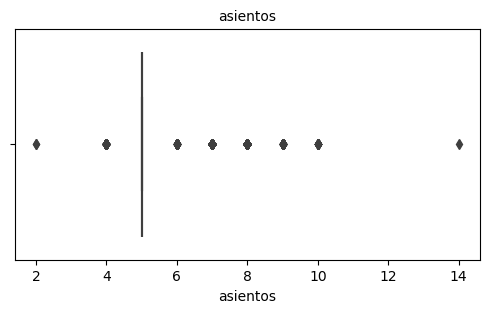

In [6]:
#identificamos los valores faltamtes o atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['asientos'])
plt.title('asientos', fontsize=10)

In [7]:
#Contamos los valores vacios de las columnas que tienen menos datos

cantidad_vacios = data['asientos'].isna().sum()
print("Cantidad de valores vacíos en asientos:", cantidad_vacios)

Cantidad de valores vacíos en asientos: 221


In [8]:
data.isnull().sum()*100/data.shape[0]

Modelo          0.000000
Precio_Venta    0.000000
Kilometro       0.000000
kilometraje     2.718996
Motor           2.718996
max_power       2.657480
asientos        2.718996
dtype: float64

Text(0.5, 1.0, 'Precio_Venta')

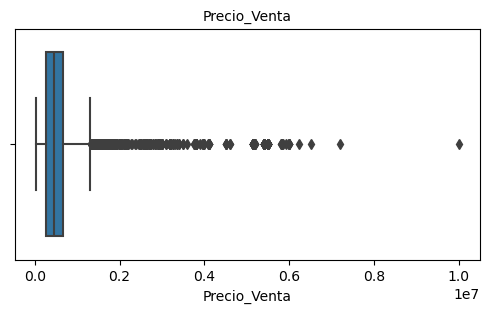

In [9]:
#comprobamos valores atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Precio_Venta'])
plt.title('Precio_Venta', fontsize=10)

In [10]:
# eliminamos valores atipicos de precio de venta
Q1 = data.Precio_Venta.quantile(0.25)
Q3 = data.Precio_Venta.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Precio_Venta >= Q1 - 1.5*IQR) & (data.Precio_Venta <= Q3 + 1.5*IQR)]

Text(0.5, 1.0, 'Precio_Venta')

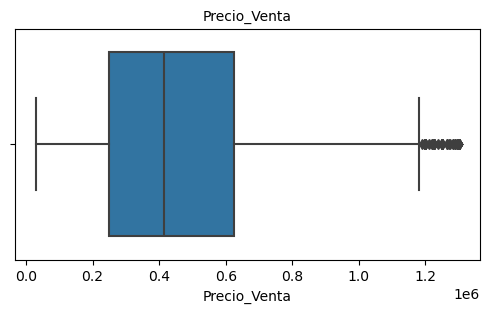

In [11]:
plt.figure(figsize=(6,3))
sns.boxplot(x=data['Precio_Venta'])
plt.title('Precio_Venta', fontsize=10)

In [12]:
moda_asientos=data['asientos'].mode()[0]
print ("Moda asientos",moda_asientos)
data['asientos'].fillna(moda_asientos,inplace=True)

Moda asientos 5.0


In [13]:
# modificamos valores atipicos de asientos

media = round(data['asientos'].mean())
data.loc[data['asientos'] > 10, 'asientos'] = media


data['kilometraje'].fillna(data['kilometraje'].mean(), inplace=True)
data['Motor'].fillna(data['Motor'].mean(), inplace=True)
data['max_power'].fillna(data['max_power'].mean(), inplace=True)
data.isnull().sum()*100/data.shape[0]


Modelo          0.0
Precio_Venta    0.0
Kilometro       0.0
kilometraje     0.0
Motor           0.0
max_power       0.0
asientos        0.0
dtype: float64

In [14]:
#punto 3 caracteristica mas relevante 
data[['Precio_Venta']].head(20)

,Precio_Venta
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
7,45000
8,350000
9,200000


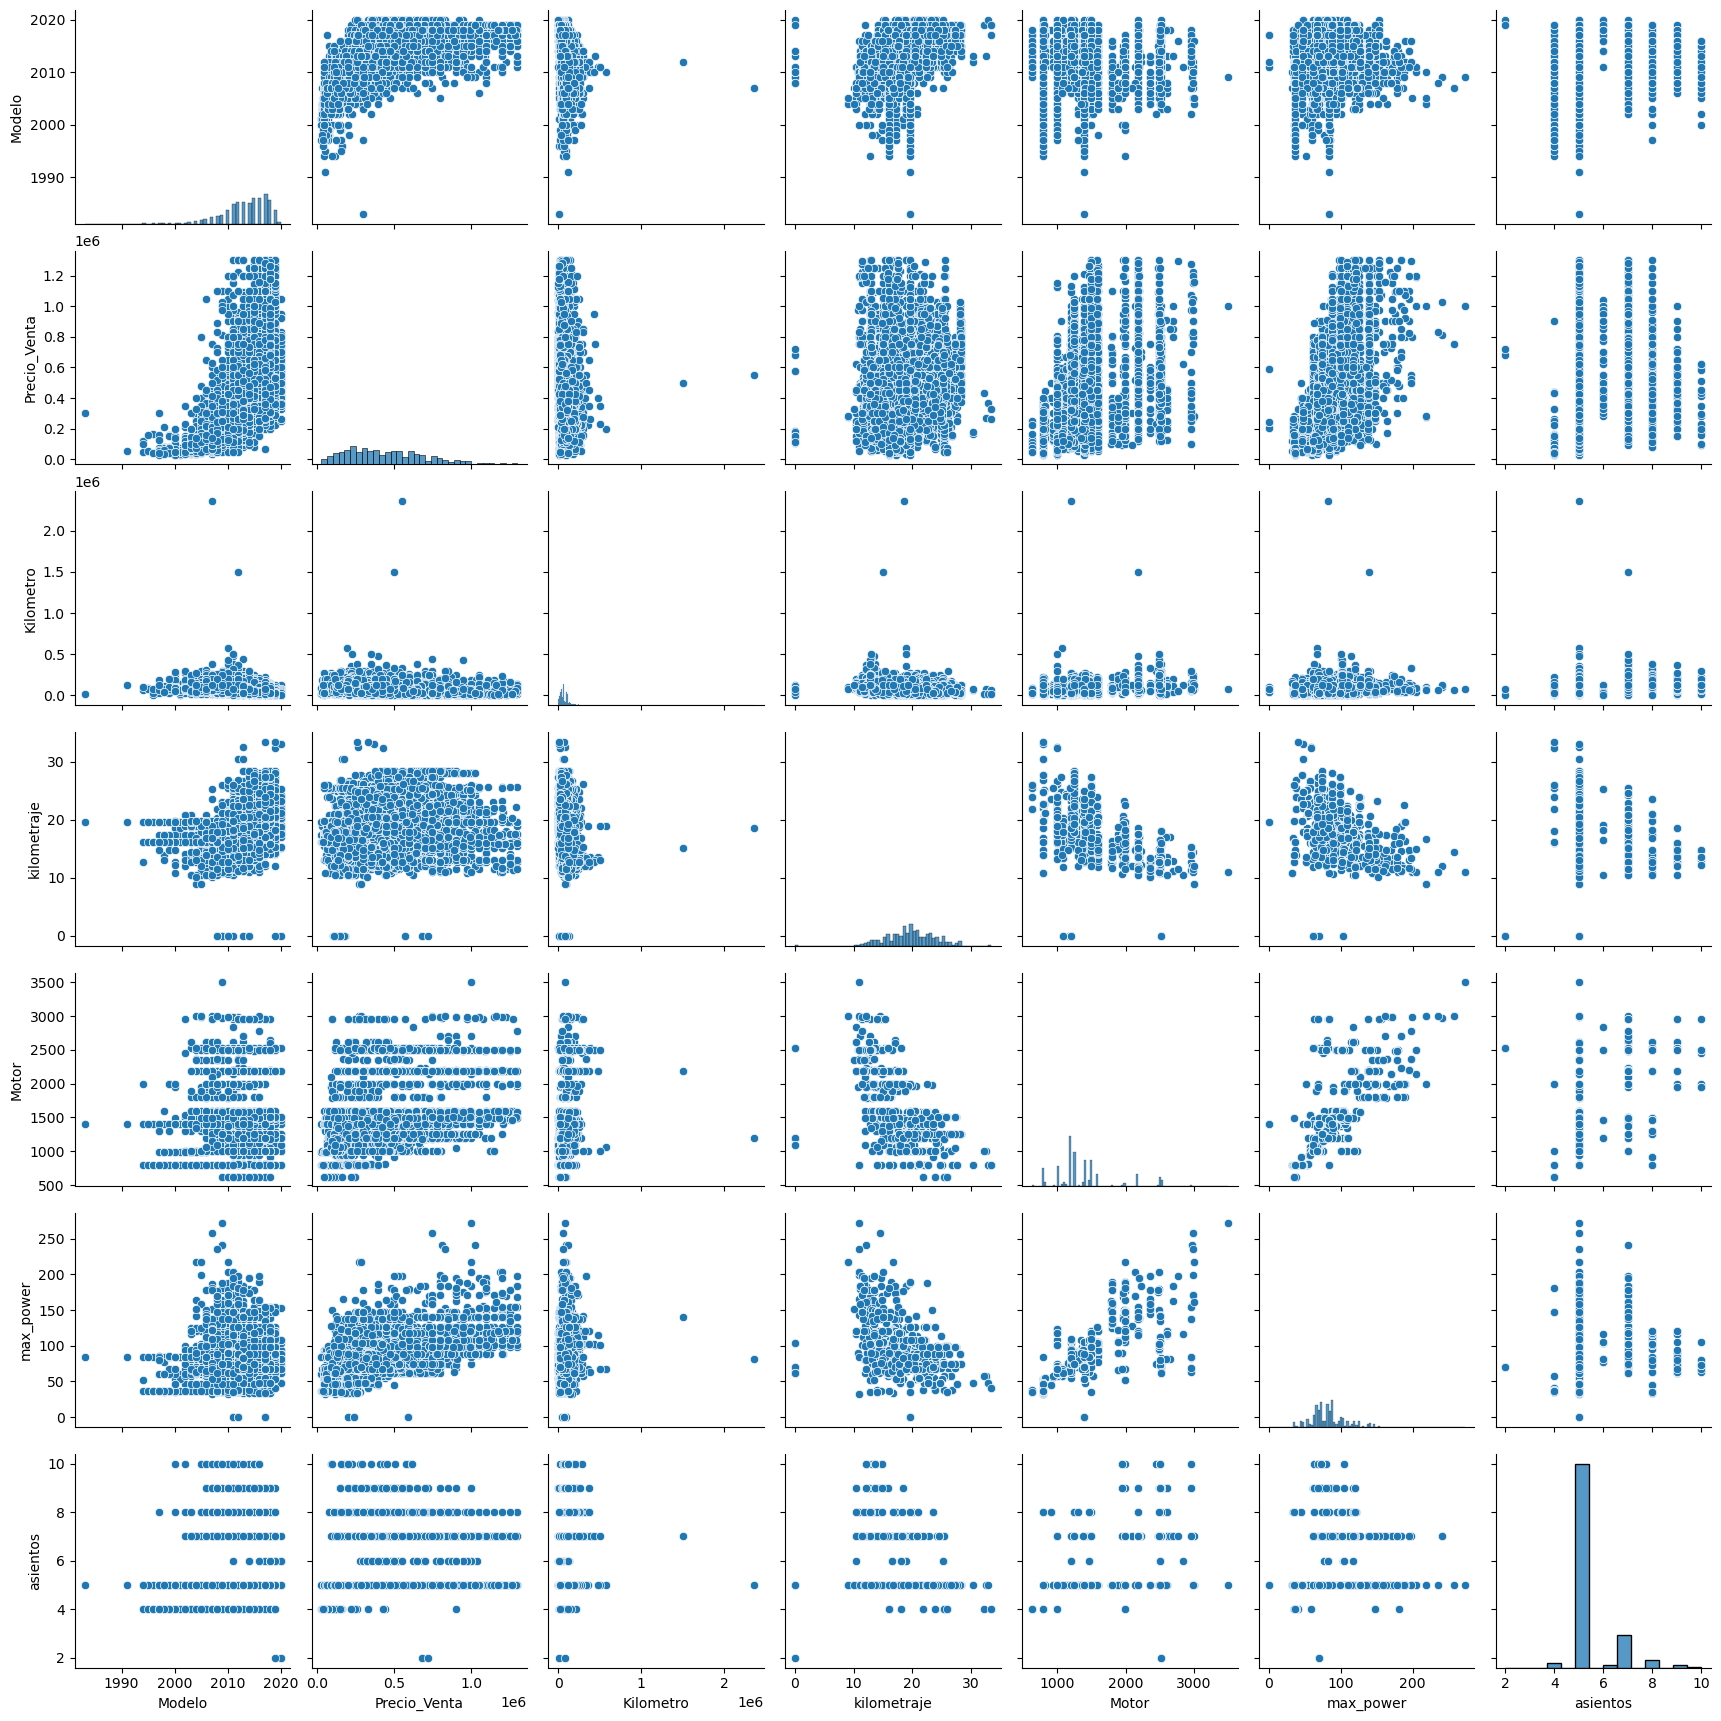

In [15]:
sns.pairplot(data)
plt.show()

In [45]:
#punto 4

from sklearn.model_selection import train_test_split


np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.75, test_size = 0.25, random_state = 100)

In [46]:
print(df_train)

      Modelo  Precio_Venta  Kilometro  kilometraje   Motor  max_power  \
6462    2013        360000      70000        23.40  1248.0       74.0   
1890    2003         65000      90000        16.10   796.0       37.0   
4299    2006        650000      40000        11.70  1796.0      178.0   
292     2013        290000      50000        16.95  1197.0       78.9   
6356    2011        225000      90000        20.54  1598.0      103.6   
...      ...           ...        ...          ...     ...        ...   
89      2017        280000      32000        14.00   796.0       35.0   
4242    2016        550000      56494        18.20  1199.0       88.7   
6437    2011        200000      60000        20.36  1197.0       78.9   
7485    2005        130000      79000        13.10  1493.0       82.0   
6097    2014        500000     120000        20.45  1461.0       83.8   

      asientos  
6462       5.0  
1890       4.0  
4299       5.0  
292        5.0  
6356       5.0  
...        ...  
89  

In [47]:
print(df_test)

      Modelo  Precio_Venta  Kilometro  kilometraje   Motor  max_power  \
6457    2012        200000      90000        11.57  2179.0     138.10   
7675    2011        250000      90000        21.10  1248.0      73.90   
6277    2009        135000     110000        17.00  1405.0      71.00   
2377    2018        650000      20706        23.80  1499.0      98.63   
3107    2007        400000      42000        11.74  1796.0     186.00   
...      ...           ...        ...          ...     ...        ...   
1383    2013        525000      56429        19.01  1461.0     108.45   
873     2016        500000      40000        18.60  1197.0      81.83   
256     2017        500000      75000        26.80  1248.0      74.00   
6299    2013        380000      57000        22.90  1248.0      74.00   
4207    2017        500000      62960        25.83  1498.0      99.00   

      asientos  
6457       7.0  
7675       5.0  
6277       5.0  
2377       5.0  
3107       5.0  
...        ...  
1383

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
# se escalan las variables
scaler = MinMaxScaler()

num_vars = ['Modelo','Precio_Venta','Kilometro','kilometraje','Motor', 'max_power','asientos']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_train.describe()

,Modelo,Precio_Venta,Kilometro,kilometraje,Motor,max_power,asientos
count,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000
mean,0.826660,0.335782,0.030248,0.588802,0.269337,0.311089,0.424681
std,0.108619,0.204231,0.025435,0.116377,0.157128,0.093477,0.118254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.756757,0.173229,0.014411,0.511364,0.199374,0.250000,0.375000
50%,0.837838,0.307087,0.027229,0.588481,0.217119,0.300956,0.375000
75%,0.918919,0.468504,0.041959,0.674043,0.304106,0.362463,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
y_train = df_train.pop('Precio_Venta')
X_train = df_train

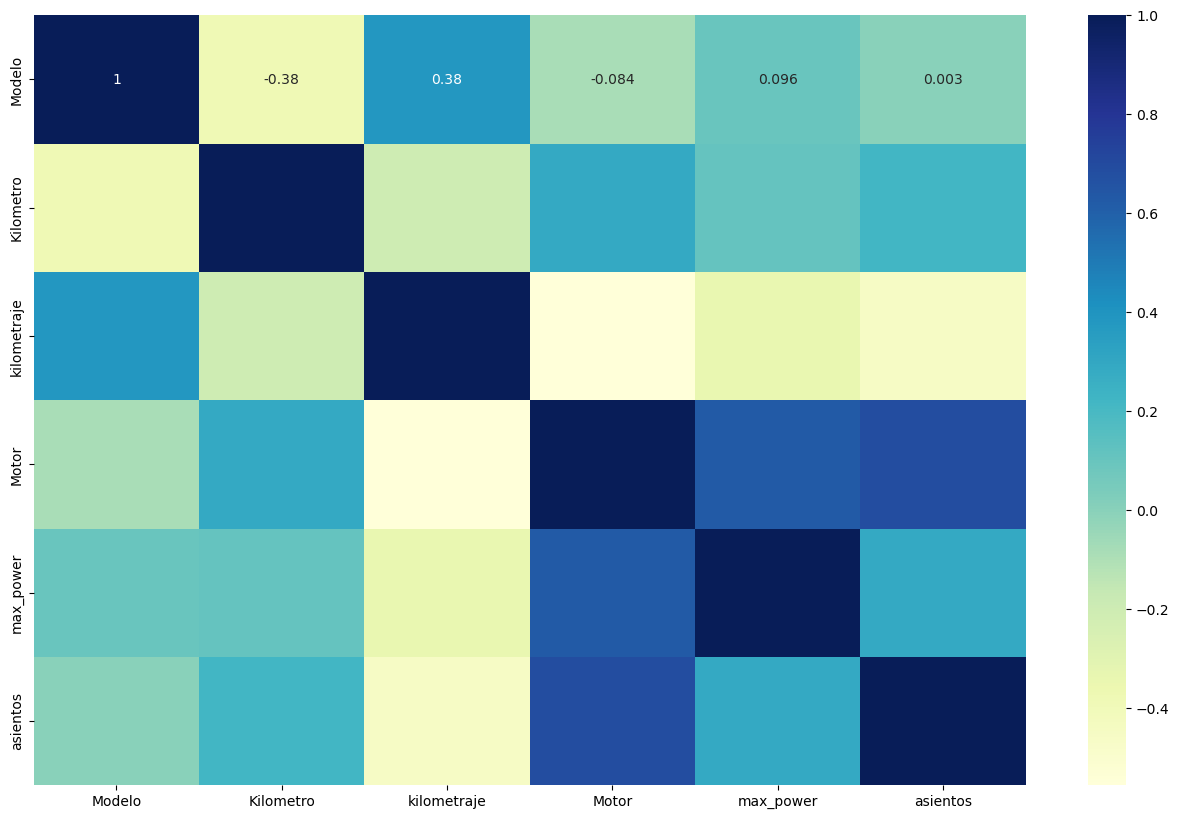

In [51]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
#punto 5 entrenar el modelo
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train,y_train)

prediccion=modelo_regresion.predict(X_train)

In [58]:
print(y_train)

6462    0.259843
1890    0.027560
4299    0.488189
292     0.204725
6356    0.153544
          ...   
89      0.196851
4242    0.409449
6437    0.133859
7485    0.078741
6097    0.370079
Name: Precio_Venta, Length: 5646, dtype: float64


In [59]:
print(X_train)

        Modelo  Kilometro  kilometraje     Motor  max_power  asientos
6462  0.810811   0.029244     0.699761  0.217119   0.272059     0.375
1890  0.540541   0.037721     0.481459  0.059847   0.136029     0.250
4299  0.621622   0.016529     0.349880  0.407794   0.654412     0.375
292   0.810811   0.020767     0.506878  0.199374   0.290074     0.375
6356  0.756757   0.037721     0.614234  0.338900   0.380882     0.375
...        ...        ...          ...       ...        ...       ...
89    0.918919   0.013139     0.418660  0.059847   0.128676     0.375
4242  0.891892   0.023520     0.544258  0.200070   0.326103     0.375
6437  0.756757   0.025006     0.608852  0.199374   0.290074     0.375
7485  0.594595   0.033058     0.391746  0.302366   0.301471     0.375
6097  0.837838   0.050435     0.611543  0.291232   0.308088     0.375

[5646 rows x 6 columns]


In [63]:
print (prediccion) 

[ 0.2869695  -0.20633335  0.42740451 ...  0.22903521  0.05826959
  0.33872025]
